In [1]:
!pip install requests
!pip install werkzeug
!pip install pillow
!pip install google-cloud-translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


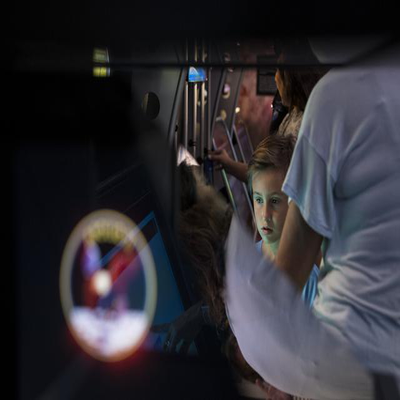

In [ ]:
# importing modules
from requests.auth import HTTPBasicAuth
import requests
import urllib.parse
from PIL import Image, ImageTk
from urllib.request import urlopen
import tkinter


url = 'https://images-api.nasa.gov/search'
# api key that we recieved from NASA   
api_key = "vKL2xEwSCCT45K0PpLp4bKfySVdWBKWed6ueM8HX"
# building the url request
headers = {'Accept': 'application/json'}
auth = HTTPBasicAuth('api_key', api_key)
post_data = {'q' : 'apollo 11', 'media_type' : 'image'}
# Form data must be provided already urlencoded.
params = urllib.parse.urlencode(post_data)
# get the response with all the images
req = requests.get(url, headers=headers, auth=auth, params=params)
# format the response
data_json = req.json()
# empty array to store the images in
images = []

# function to search for and store the images in the images array
def process_images(num_images):  
    for i in range(num_images):
        # renaming the images to have them numbered rather than ambiguous text
        image_filename = "image%s.jpg" % i
        # searching for, resizing and opening the image 
        number_img = Image.open(urlopen(data_json["collection"]["items"][i]["links"][0]['href'])).resize((400, 400), Image.ANTIALIAS)
        #number_img = ImageTk.PhotoImage(number_img)
        images.append(number_img)

process_images(len(data_json["collection"]["items"]))
# how we can access the images
images[1]

In [20]:
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS']="CSahlaniSA_Key.json"

def translate_text(target, user_input, format=None):
    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    import six
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(user_input, six.binary_type):
        user_input = user_input.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(user_input, target_language=target, format_= format)

    print(u"Text: {}".format(result["input"]))
    print(u"Translation: {}".format(result["translatedText"]))
    print(u"Detected source language: {}".format(result["detectedSourceLanguage"]))

translate_text("fr", "hello")


Text: hello
Translation: bonjour
Detected source language: en
